# 2EL1730: Machine Learning
## CentraleSupelec

### Lab 7: Deep Neural Network for Hand-written Digit Recognition

#### Description

The goal of this lab is to implement a deep neural network that utilize convolutional, pooling, dropout and normalization layer in order to solve the task of hand-written digit recognition. For the puprosed of this we are going to utilize `tensorflow` one of the major deep learning frameworks with definitions of the different layers.


In [62]:
# imports nessecary libraries
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Part 1
#### Loading and Visualizing the MNIST Dataset

In order to load the MNIST Dataset we are going to utilize the loader from `keras` within `tensorflow`

[5 0 4 1 9]
x_train shape: (60000, 28, 28)  -  x_test shape: (10000, 28, 28)
y_train shape: (60000, 10)  -  y_test shape: (10000, 10)
Categorical Target: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


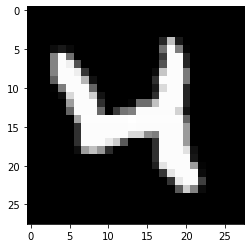

In [63]:
# Loads the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizes data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(y_train[:5])
# Converts a class vector (integers) to binary class matrix
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print('x_train shape:', x_train.shape, ' - ', 'x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape, ' - ', 'y_test shape:', y_test.shape)

# Plots and example
sample_idx = 20
plt.imshow(x_train[sample_idx,...], cmap='gray')
print('Categorical Target:', y_train[sample_idx])

In [64]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Part 2
#### Setting up the Deep Neural Network

Edit the following linear logistic regression model and change it to the LeNet architecture. You can try different kernel, pooling and stride sizes for the different layers. Documentation about the defined layers can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/layers

![LeNet](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

In [65]:
tf.keras.layers.Conv2D

tensorflow.python.keras.layers.convolutional.Conv2D

In [66]:
# The model that you will implement should have the following architecture
#1 -> Convolutional layer with 6 kernels and tanh activation function
#2 -> Max pooling downsampling the image by 2
#3 -> Convolutional layer with 16 kernels and tanh activation function
#4 -> Max pooling downsampling the image by 2
#5 -> Fully connected layer with 120 units
#6 -> Fully connected layer with 84 units
#7 -> Fully connected layer with 10 units

# Demo Model Definition
inp = tf.keras.Input(shape=(28,28,1))
x =  tf.keras.layers.Conv2D(filters = 6,kernel_size = (3,3), activation = 'tanh')(inp)
x = tf.keras.layers.MaxPool2D(pool_size = (2,2))(x)

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'tanh')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation = 'tanh')(x)
x = tf.keras.layers.Dense(84, activation = 'tanh')(x)
out = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs=inp, outputs=out)
model.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               4812

#### Model Compilation and Training

In this part the above model is compiled some the learning parameters are defined and it is trained for a few epochs.

In [67]:
# Use the model.compile and model.fit to train the model
# loss = categorical_crossentropy , optimizer=sgd
# batch_size=64, validation_split=0.2, epochs=5
model.compile(loss = 'categorical_crossentropy' , optimizer='sgd', metrics=["accuracy"])
history = model.fit(x_train[...,None],y_train, batch_size=64, validation_split=0.2, epochs=10)

Epoch 1/10
750/750 [==============================] - 7s 10ms/step - loss: 1.6323 - accuracy: 0.5386 - val_loss: 0.4292 - val_accuracy: 0.8907
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.4074 - accuracy: 0.8932 - val_loss: 0.2837 - val_accuracy: 0.9226
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2790 - accuracy: 0.9221 - val_loss: 0.2252 - val_accuracy: 0.9387
Epoch 4/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2279 - accuracy: 0.9356 - val_loss: 0.1908 - val_accuracy: 0.9471
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0.1914 - accuracy: 0.9460 - val_loss: 0.1661 - val_accuracy: 0.9535
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1683 - accuracy: 0.9515 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1435 - accuracy: 0.9592 - val_loss: 0.1330 - val_accuracy: 0.9618
Ep

### Part 3
#### Training Evaluation

The learning curves and testing results are calculated and presented

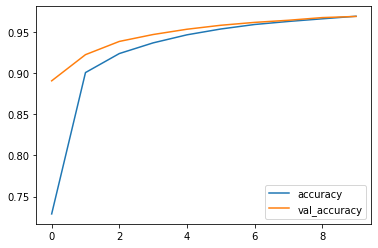

In [68]:
# Plots the learning curves
[plt.plot(value, label=key) for key,value in history.history.items() if key in ['accuracy','val_accuracy']]
plt.legend()
plt.show()

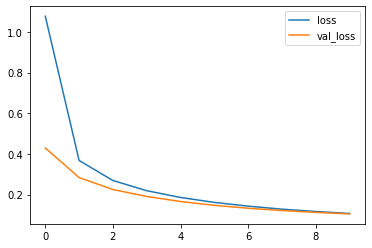

In [69]:
# Plots the learning curves
[plt.plot(value, label=key) for key,value in history.history.items() if key in ['val_loss','loss']]
plt.legend()
plt.show()

In [70]:
# Evaluates the trained model on the test set. 
#Use the model.evaluate function
test_scores = model.evaluate(x_test[...,None], y_test)
print('Test Loss:', test_scores[0])
print('Test Accuracy:', test_scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9729
Test Loss: 0.09553316980600357
Test Accuracy: 0.9728999733924866


In [71]:
# Calculate the network's predictions and prints the confusion matrix. 
#Use model.predict function
preds = model.predict(x_test[...,None])
print(tf.math.confusion_matrix(tf.math.argmax(y_test,axis = -1), tf.math.argmax(preds,axis = -1)))

tf.Tensor(
[[ 972    0    2    0    0    1    2    1    2    0]
 [   0 1122    5    0    0    0    4    1    3    0]
 [   5    3 1001    2    3    2    2   10    4    0]
 [   0    0    7  979    0    7    0    6    9    2]
 [   1    0    3    0  965    0    4    2    2    5]
 [   6    0    1    7    1  864    6    1    5    1]
 [   9    3    1    0    4    3  936    0    2    0]
 [   2    4   19    4    2    0    0  989    1    7]
 [   6    0    6    7    2    3    3   10  931    6]
 [   7    5    2    4    6    6    0    7    2  970]], shape=(10, 10), dtype=int32)


In [72]:
from sklearn.metrics import classification_report
print(classification_report(tf.math.argmax(y_test,axis=-1),  tf.math.argmax(preds,axis=-1)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Part 4
#### Print the kernels of the network

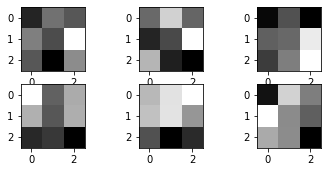

In [73]:
# Use get_weights() function
plt.figure()
kernels,biases = model.layers[1].get_weights()
columns = 3 
for i in range((kernels.shape[-1])):
    kernel = kernels[:,:,0,i]
    plt.subplot(kernels.shape[-1]/columns+1,columns, i+1)
    plt.imshow(kernel, cmap = 'gray')

### Part 5
### Modify the initial architecture adding dropout layers and other activation functions.

In [74]:
# Model Definition
inp = tf.keras.Input(shape=(28,28,1))
x =  tf.keras.layers.Conv2D(filters = 6,kernel_size = (3,3), activation = 'relu')(inp)
x = tf.keras.layers.MaxPool2D(pool_size = (2,2))(x)

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu')(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(84, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
out = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs=inp, outputs=out)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               4812

In [75]:
# Use the model.compile and model.fit to train the model
# loss = categorical_crossentropy , optimizer=sgd
# batch_size=64, validation_split=0.2, epochs=5
model.compile(loss = 'categorical_crossentropy' , optimizer='sgd', metrics=["accuracy"])
history = model.fit(x_train[...,None],y_train, batch_size=64, validation_split=0.2, epochs=10)
print('Done!')

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 2.0416 - accuracy: 0.2799 - val_loss: 0.3773 - val_accuracy: 0.8921
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.5037 - accuracy: 0.8406 - val_loss: 0.2272 - val_accuracy: 0.9305
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3302 - accuracy: 0.8996 - val_loss: 0.1714 - val_accuracy: 0.9484
Epoch 4/10
750/750 [==============================] - 6s 9ms/step - loss: 0.2599 - accuracy: 0.9193 - val_loss: 0.1404 - val_accuracy: 0.9587
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2192 - accuracy: 0.9342 - val_loss: 0.1205 - val_accuracy: 0.9629
Epoch 6/10
750/750 [==============================] - 6s 9ms/step - loss: 0.1913 - accuracy: 0.9430 - val_loss: 0.1086 - val_accuracy: 0.9656
Epoch 7/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1749 - accuracy: 0.9469 - val_loss: 0.0993 - val_accuracy: 0.9699
Epoch 